# Elon_musk

For Text Mining assignment

ONE: 1) Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

TWO: 1) Extract reviews of any product from ecommerce website like amazon 2) Perform emotion mining

# Sentiment Analysis on the Elon-musk tweets (Exlon-musk.csv)

In [1]:
!pip install spacy
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [2]:
!python -m spacy download en

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 12.8/12.8 MB 261.6 kB/s eta 0:00:00
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use
the full pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [3]:
import numpy as np
import pandas as pd
import string
import spacy

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [4]:
import pandas 

tweets=pd.read_csv(r"C:\Users\shira\Desktop\Assignments\ASSIGNMENT 11_Text Mining\Elon_musk.csv",error_bad_lines=False,encoding='latin-1')

C:\Users\shira\AppData\Local\Temp\ipykernel_66536\4164708311.py:3: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  tweets=pd.read_csv(r"C:\Users\shira\Desktop\Assignments\ASSIGNMENT 11_Text Mining\Elon_musk.csv",error_bad_lines=False,encoding='latin-1')


In [5]:
tweets

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [6]:
#remove both the leading and the trailing characters
tweets=[Text.strip() for Text in tweets.Text] 
# removes empty strings,because they are considered in python as Flase
tweets=[Text for Text in tweets if Text] 
tweets[0:10]

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [7]:
# Joining the list into one string/text
tweets_text=' '.join(tweets)
tweets_text

'@kunalb11 I\x92m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It\x92s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U

In [8]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shira\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [9]:
from nltk import tokenize
sentences= tokenize.sent_tokenize("".join(tweets))
sentences[5:15]

['!Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2ojFrodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)@flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely@GiveDirectly Just sent someJust agree to do Clubhouse with @kanyewesthttps://t.co/3rWE9uHSTS@geoffkeighley @UnrealEngine It\x92s getting realBought some Dogecoin for lil X, so he can be a toddler hodler@JoshManMode He definitely has issues, but the sentencing seems a bit high@freewalletorg Thanks for fixing@freewalletorg Please unlock my account@AstroJordy <U+0001F923><U+0001F923>This is true power haha https://t.co/Fc9uhQSd7O@freewalletorg Any crypto wallet that won\x92t give you your private keys should be avoided at all costs@freewalletorg Your app sucksRT @SpaceX: NASA has selected Falcon Heavy to launch the first two elements of the lunar Ga

In [10]:
# remove Twitter username handles from a given twitter text. (Removes @usernames)
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
tweets_tokens=tknzr.tokenize(tweets_text)
print(tweets_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can'

In [11]:
# Again Joining the list into one string/text
tweets_tokens_text=' '.join(tweets_tokens)
tweets_tokens_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to 

In [12]:
# Remove Punctuations 
no_punc_text=tweets_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Ga

In [13]:
# remove https or url within text
import re
no_url_text=re.sub(r'http\S+', '', no_punc_text)
no_url_text

'I \x92 m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It \x92 s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won \x92 t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reason

## # Tokenization

In [14]:

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shira\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
from nltk.tokenize import word_tokenize
text_tokens=word_tokenize(no_url_text)
print(text_tokens)

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It', '\x92', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'Thanks', 'for', 'fixing',

In [16]:
len(text_tokens)

17847

In [17]:
text_tokens[0:10]

['I', '\x92', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with']

## Stopwords

In [18]:
#Remove stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

my_stop_words=stopwords.words('english')
my_stop_words.append('the')
my_stop_words.append('Its')

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:40])

['I', '\x92', 'alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely']


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shira\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shira\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
my_stop_words[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

##  Normalization

In [20]:
#Normalize the data/converting to lower case
lower_words=[x.lower() for x in no_stop_tokens]
print(lower_words[0:25])

['i', '\x92', 'alien', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'great', 'interview', 'doge', 'underestimated', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy']


## Stremming

In [21]:
# Streamming
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stemmed_tokens=[ps.stem(word) for word in lower_words]
print(stemmed_tokens[0:40])

['i', '\x92', 'alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'great', 'interview', 'doge', 'underestim', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thank', 'inde', 'tweet', 'definit']


In [22]:
!python -m spacy download en

Defaulting to user installation because normal site-packages is not writeable
     -------------------------------------- 12.8/12.8 MB 295.2 kB/s eta 0:00:00
[!] As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use
the full pipeline package name 'en_core_web_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [23]:
# NLP english language model of spacy liabrary
nlp=spacy.load('en_core_web_sm')

## Limitazation

In [24]:
#lemmas being one odf them, but mostly POS,which will follow later
doc=nlp(' '.join(no_stop_tokens))
print(doc[0:40])

I  alien Ray tracing Cyberpunk HDR nextlevel Have tried Great interview Doge underestimated Congratulations Tesla China amazing execution last year Now next even Happy New Year Ox Frodo underdoge All thought would fail Himself Haha thanks Indeed Tweets definitely


In [25]:
lemmas=[token.lemma_ for token in doc]
print(lemmas[0:25])

['I', '\x92', 'alien', 'Ray', 'trace', 'Cyberpunk', 'HDR', 'nextlevel', 'have', 'try', 'great', 'interview', 'Doge', 'underestimate', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'Happy']


## Feature Extraction

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
X=vectorizer.fit_transform(lemmas) 

In [27]:
vectorizer.vocabulary_

{'alien': 195,
 'ray': 2376,
 'trace': 3051,
 'cyberpunk': 772,
 'hdr': 1370,
 'nextlevel': 1981,
 'have': 1365,
 'try': 3083,
 'great': 1316,
 'interview': 1568,
 'doge': 896,
 'underestimate': 3220,
 'congratulations': 679,
 'tesla': 2956,
 'china': 587,
 'amazing': 218,
 'execution': 1064,
 'last': 1653,
 'year': 3441,
 'now': 2009,
 'next': 1980,
 'even': 1039,
 'happy': 1352,
 'new': 1978,
 'ox': 2110,
 'frodo': 1217,
 'underdoge': 3219,
 'all': 198,
 'thought': 2993,
 'would': 3426,
 'fail': 1098,
 'himself': 1412,
 'haha': 1340,
 'thank': 2967,
 'indeed': 1508,
 'tweet': 3101,
 'definitely': 809,
 'represent': 2442,
 'realworld': 2391,
 'time': 3010,
 'allocation': 200,
 'the': 2972,
 'entertaining': 1009,
 'outcome': 2089,
 'likely': 1710,
 'just': 1610,
 'send': 2586,
 'agree': 179,
 'clubhouse': 617,
 'it': 1588,
 'get': 1277,
 'real': 2386,
 'buy': 503,
 'dogecoin': 898,
 'lil': 1711,
 'toddler': 3021,
 'hodler': 1418,
 'he': 1371,
 'issue': 1587,
 'sentencing': 2591,
 'seem

In [28]:
pd.DataFrame(vectorizer.vocabulary_,columns=vectorizer.vocabulary_.keys(),index=[0]).T

,0
alien,195
ray,2376
trace,3051
cyberpunk,772
hdr,1370
...,...
click,609
samwise,2533
gamgee,1250
altho,210


In [29]:
pd.DataFrame.from_records([vectorizer.vocabulary_]).T.sort_values(0,ascending=False).head()

,0
ðogecoin,3460
zone,3459
zon,3458
zip,3457
zero,3456


In [30]:
print(vectorizer.vocabulary_)

{'alien': 195, 'ray': 2376, 'trace': 3051, 'cyberpunk': 772, 'hdr': 1370, 'nextlevel': 1981, 'have': 1365, 'try': 3083, 'great': 1316, 'interview': 1568, 'doge': 896, 'underestimate': 3220, 'congratulations': 679, 'tesla': 2956, 'china': 587, 'amazing': 218, 'execution': 1064, 'last': 1653, 'year': 3441, 'now': 2009, 'next': 1980, 'even': 1039, 'happy': 1352, 'new': 1978, 'ox': 2110, 'frodo': 1217, 'underdoge': 3219, 'all': 198, 'thought': 2993, 'would': 3426, 'fail': 1098, 'himself': 1412, 'haha': 1340, 'thank': 2967, 'indeed': 1508, 'tweet': 3101, 'definitely': 809, 'represent': 2442, 'realworld': 2391, 'time': 3010, 'allocation': 200, 'the': 2972, 'entertaining': 1009, 'outcome': 2089, 'likely': 1710, 'just': 1610, 'send': 2586, 'agree': 179, 'clubhouse': 617, 'it': 1588, 'get': 1277, 'real': 2386, 'buy': 503, 'dogecoin': 898, 'lil': 1711, 'toddler': 3021, 'hodler': 1418, 'he': 1371, 'issue': 1587, 'sentencing': 2591, 'seem': 2578, 'bit': 421, 'high': 1405, 'fix': 1163, 'please': 22

In [31]:
print(vectorizer.get_feature_names()[50:100])
print(X.toarray()[50:100])

['250kw', '25gunsteslacom', '25k', '25th', '28', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445', '448', '4530', '4680', '479000', '48', '4d', '4th', '50', '50000', '50k', '60', '60000', '65', '69420', '6f', '6k', '727']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [32]:
print(X.toarray().shape)

(12111, 3461)


##  N-Grams
Bigrams & Trigrams

In [33]:
vectorizer_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=vectorizer_ngram_range.fit_transform(tweets)

In [34]:
bow_matrix_ngram

<1999x100 sparse matrix of type '<class 'numpy.int64'>'
	with 9618 stored elements in Compressed Sparse Row format>

In [35]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['0001f923', '0001f923 0001f923', 'about', 'all', 'also', 'amp', 'an', 'and', 'are', 'as', 'at', 'be', 'but', 'by', 'can', 'cleantechnica', 'co', 'do', 'dragon', 'erdayastronaut', 'first', 'flcnhvy', 'for', 'from', 'good', 'great', 'haha', 'has', 'have', 'he', 'high', 'https', 'https co', 'id_aa_carmack', 'if', 'in', 'in the', 'is', 'it', 'just', 'kristennetten', 'launch', 'like', 'make', 'marcushousegame', 'more', 'most', 'much', 'my', 'nasa', 'nasaspaceflight', 'need', 'new', 'no', 'not', 'of', 'of the', 'on', 'one', 'or', 'our', 'out', 'people', 'ppathole', 'probably', 'rationaletienne', 're', 'rt', 'rt spacex', 'should', 'so', 'some', 'spacex', 'starship', 'sure', 'tesla', 'teslaownerssv', 'teslarati', 'than', 'that', 'the', 'there', 'they', 'this', 'this is', 'to', 'too', 'true', 'was', 'we', 'what', 'wholemarsblog', 'will', 'will be', 'with', 'would', 'yeah', 'year', 'yes', 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]


## TFidf Vectorizer

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features=TfidfVectorizer(norm="l2",analyzer='word',ngram_range=(2,3),max_features=10)
tf_idf_metrix_n_gram_max_features=vectorizer_n_gram_max_features.fit_transform(tweets)

print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_metrix_n_gram_max_features.toarray())

['0001f923 0001f923', 'https co', 'in the', 'of the', 'rt spacex', 'this is', 'to be', 'to the', 'we re', 'will be']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Generate wordcloud

In [37]:
# Import Packages
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud,STOPWORDS

#Define a funtion to plot word cloud
def plot_cloud(wordcloud):
  #set figure size
  plt.figure(figsize=(40,30))
  #Display image 
  plt.imshow(wordcloud)
  # No axis details
  plt.axis("off");

In [38]:
# Generate wordcloud
stopwords=STOPWORDS
stopwords.add('pron')
stopwords.add('yeah')
stopwords.add('rt')
stopwords.add('work')
stopwords.add('good')

wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=100,colormap='Set2',stopwords=stopwords).generate(text)
#plot
plot_cloud(wordcloud)

NameError: name 'text' is not defined

## Named Entity Recognition

In [39]:
nlp=spacy.load('en_core_web_sm')

one_block=tweets[1997]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [40]:
one_block

'@PPathole Altho Dumb and Dumber is <U+0001F525><U+0001F525>'

In [41]:
for token in doc_block[0:20]:
  print(token,token.pos_)

@PPathole NOUN
Altho PROPN
Dumb PROPN
and CCONJ
Dumber PROPN
is AUX
< X
U+0001F525><U+0001F525 X
> X


### Filtering for Nouns and Verbs only

In [42]:
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[5:25])

[]


In [43]:
# Count tokens again
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)
words_freq=[(word,sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq,key=lambda x:x[1],reverse=True)
wf_df=pd.DataFrame(words_freq)
wf_df.columns=['words','count']

wf_df[0:10]

,words,count
0,ppathole,1


<AxesSubplot:title={'center':'Top Nouns and Verbs'}, xlabel='words'>

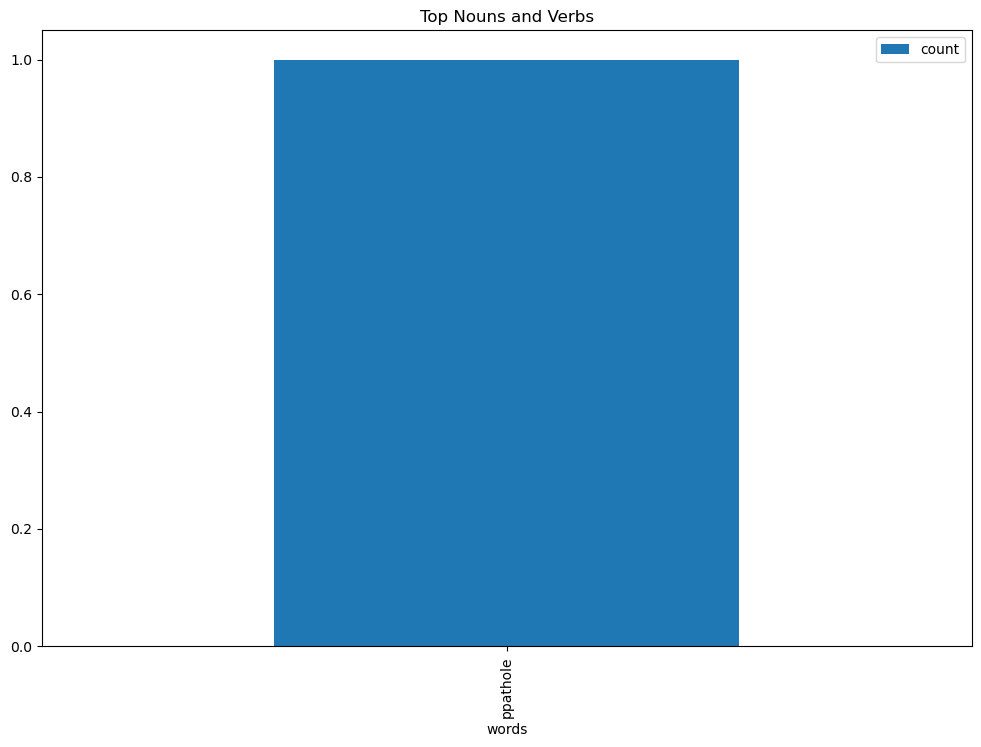

In [44]:
# visualizing results
## barchart for top 10 nouns + verbs

wf_df[0:10].plot.bar(x='words', figsize=(12,8), title='Top Nouns and Verbs')

In [45]:
sent_df=pd.DataFrame(sentences,columns=['sentences'])
sent_df

,sentences
0,@kunalb11 Im an alien@ID_AA_Carmack Ray traci...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated@teslacn Congra...
4,Now on to the next for even more!
...,...
853,Everything weve ever sensed or thought has be...
854,"@kenyanwalstreet Not actually a payout, just a..."
855,"It may never pay out, as the stock cant b ht..."
856,Details Aug 28.AI symbiosis while u wait@vista...


In [46]:
# Emotion Lexicon - Affin
afinn=pd.read_csv(r"C:\Users\shira\Desktop\class sir send\Afinn.csv",sep=',',encoding='Latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [47]:
affinity_scores= afinn.set_index("word")['value'].to_dict()

In [48]:
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [49]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence. 
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str=None):
  sent_score=0
  if text:
    sentence=nlp(text)
    print(sentence)
    for word in sentence:
      sent_score += sentiment_lexicon.get(word.lemma_, 0)
      return sent_score

In [50]:
#test that it works
calculate_sentiment(text='Unhappy')

Unhappy


-2

In [51]:
sent_df['sentiment_value'] = sent_df['sentences'].apply(calculate_sentiment)

@kunalb11 Im an alien@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.
Have you tried it?
@joerogan @Spotify Great interview!
@gtera27 Doge is underestimated@teslacn Congratulations Tesla China for amazing execution last year.
Now on to the next for even more!
!Happy New Year of the Ox!
https://t.co/9WFKMYu2ojFrodo was the underdoge,
All thought he would fail,
Himself most of all.
https://t.co/zGxJFDzzrM@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)@flcnhvy @anonyx10 Indeed!
Tweets definitely do not represent real-world time allocation.The most entertaining outcome is the most likely@GiveDirectly Just sent someJust agree to do Clubhouse with @kanyewesthttps://t.co/3rWE9uHSTS@geoffkeighley @UnrealEngine Its getting realBought some Dogecoin for lil X, so he can be a toddler hodler@JoshManMode He definitely has issues, but the sentencing seems a bit high@freewalletorg Thanks for fixing@freewalletorg Please unlock my account@AstroJordy <U+0001F923><U+0001F923>This is true p

In [52]:
# how many words are in the sentence?
sent_df['word_count']=sent_df['sentences'].str.split().apply(len)
sent_df['word_count'].head(10)

0     12
1      4
2      4
3     12
4      8
5      6
6     13
7      8
8    103
9     25
Name: word_count, dtype: int64

In [53]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentences,sentiment_value,word_count
88,Help would be appreciated.,2,4
18,Improve ship &amp; booster mass@michaelhodapp_...,2,12
350,"Hopefully, around middle of next year.",2,6
638,Grateful for my @Tesla #Powerwall and 162 hour...,3,12
84,Good progress towards our Hop in &amp; go to ...,3,18
69,Excited about offering low-cost access to o h...,3,22
135,Great game.,3,2
577,Good insight.,3,2
745,Best boss battle song ever.,3,5
230,"Wow, roc https://t.co/0SRlFg03Fg@TashaARK To ...",4,12


In [54]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    858.000000
mean       0.055944
std        0.417408
min       -2.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        4.000000
Name: sentiment_value, dtype: float64

In [55]:
# sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentences,sentiment_value,word_count
0,@kunalb11 Im an alien@ID_AA_Carmack Ray traci...,0,12
1,Have you tried it?,0,4
2,@joerogan @Spotify Great interview!,0,4
3,@gtera27 Doge is underestimated@teslacn Congra...,0,12
4,Now on to the next for even more!,0,8


In [56]:
sent_df[sent_df['sentiment_value']<2].head()['sentences'].tolist()[0]  #<-5

'@kunalb11 I\x92m an alien@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.'

In [57]:
sent_df['index']=range(0,len(sent_df))

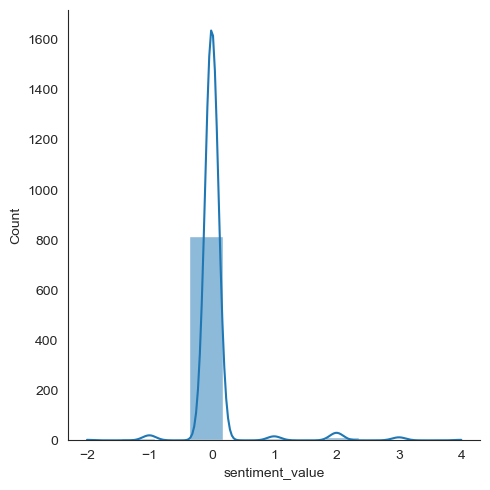

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='white')

sns.displot(data=sent_df,x='sentiment_value',kde=True)
plt.show()

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

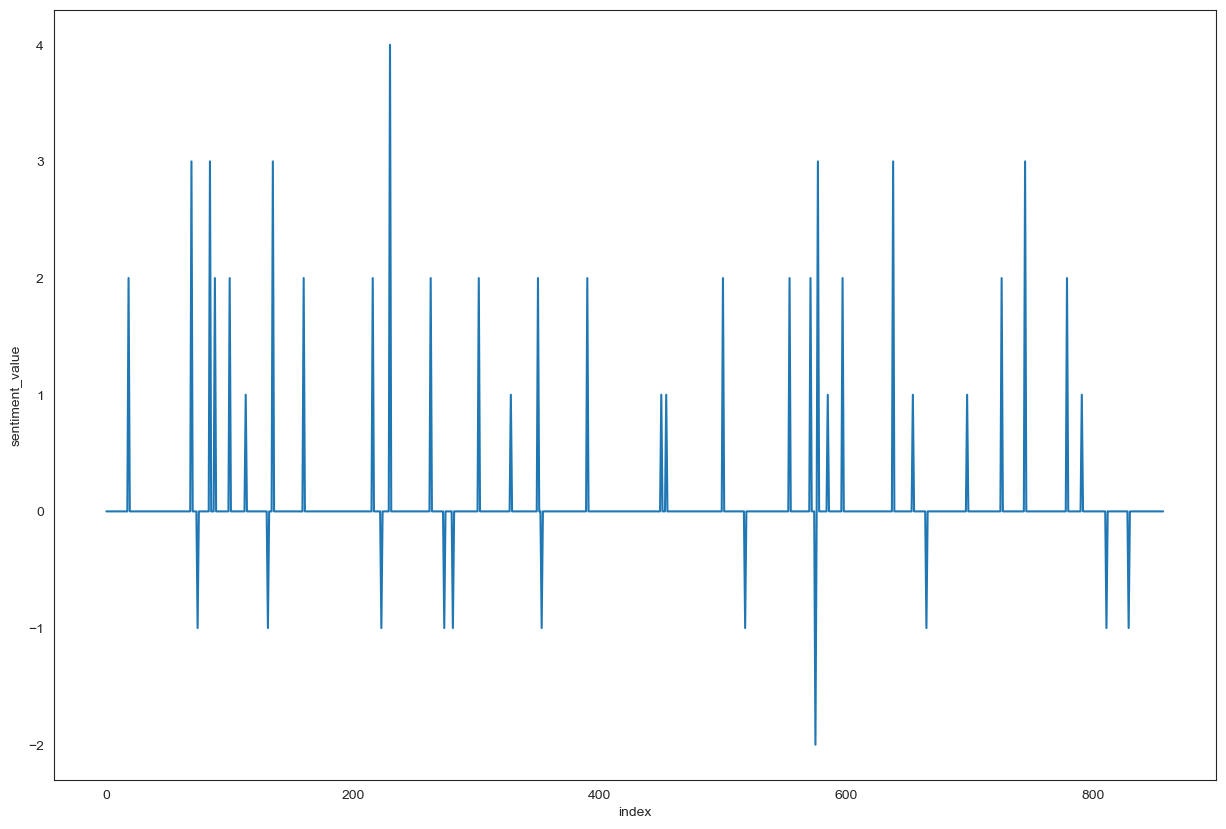

In [59]:
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence Sentiment'}, xlabel='word_count', ylabel='sentiment_value'>

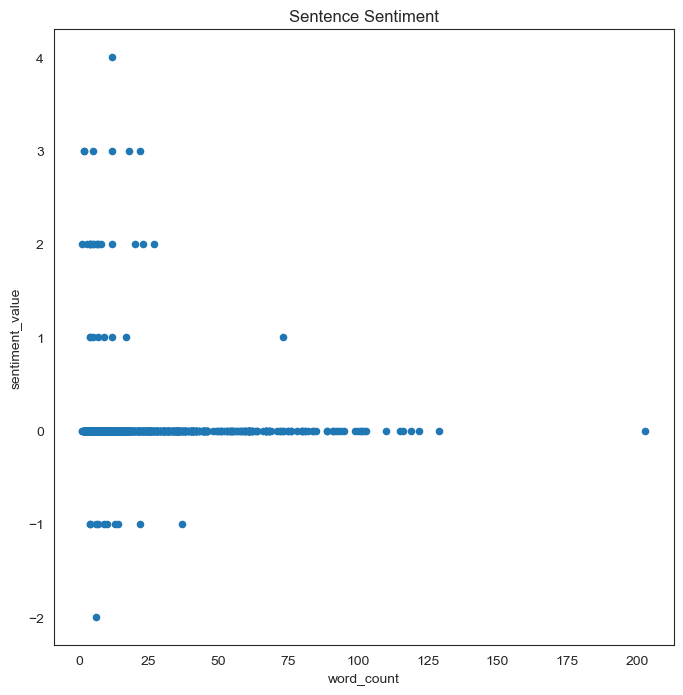

In [60]:
sent_df.plot.scatter(x='word_count',y='sentiment_value',figsize=(8,8),title='Sentence Sentiment')